In [3]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

# Reading the files

In [4]:
folder="${fastMCKalmanOptTesting}/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


Warning in <TROOT::Append>: Replacing existing TH1: hdist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamep


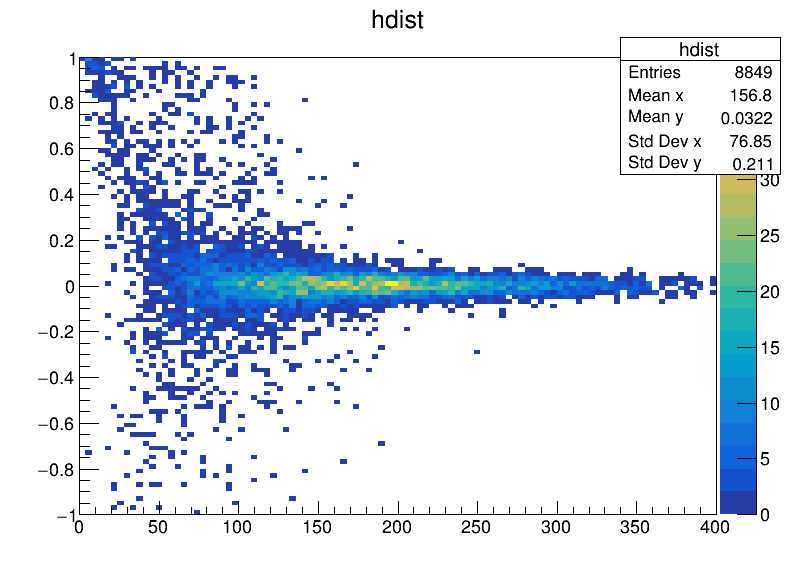

In [8]:
hdist = ROOT.TH2D("hdist","hdist",100,0,400,100,-1,1)

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    #print("entry number: ",str(iev))
    if (tree.part.fStatusMaskIn[1]!=31 or tree.part.fParamMC.size()==0): continue

    xyz_st = [tree.part.fParamMC[1].GetX(),tree.part.fParamMC[1].GetParameter()[0],tree.part.fParamMC[1].GetParameter()[1]]
    alpha_st = tree.part.fParamMC[1].GetAlpha()
    xyz_gl_st = [xyz_st[0]*np.cos(alpha_st)-xyz_st[1]*np.sin(alpha_st), xyz_st[0]*np.sin(alpha_st)+xyz_st[1]*np.cos(alpha_st), xyz_st[2]]
    x_g = xyz_gl_st[0]
    y_g = xyz_gl_st[1]
    length=0

    

    for i in range(2,tree.part.fParamMC.size()):
        xyz = [tree.part.fParamMC[i].GetX(),tree.part.fParamMC[i].GetParameter()[0],tree.part.fParamMC[i].GetParameter()[1]]
        alpha = tree.part.fParamMC[i].GetAlpha()
        xyz_gl = [xyz[0]*np.cos(alpha)-xyz[1]*np.sin(alpha), xyz[0]*np.sin(alpha)+xyz[1]*np.cos(alpha), xyz[2]]
        d = np.sqrt(np.square(xyz_gl[0]-xyz_gl_st[0])+np.square(xyz_gl[1]-xyz_gl_st[1])+np.square(xyz_gl[2]-xyz_gl_st[2]))
        length=length+d
        #print(xyz,alpha,length)
        if(np.abs(xyz[0])==250 or tree.part.fLoop[i]==1): break
        xyz_gl_st=xyz_gl
        alpha_st=alpha
    
    res=(tree.part.fParamMC[1].GetP()-tree.part.fParamIn[1].GetP())/tree.part.fParamMC[1].GetP()
    hdist.Fill(length,res)

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
hdist.Draw("COLZ")
cp.Draw()

        
        

In [11]:
x = []
y = []
ex = []
ey = []
npoints = 10

for d in range(1,npoints):
     low = int((d-1)*hdist.GetNbinsX()/npoints)
     high = int((d)*hdist.GetNbinsX()/npoints)
     lowloc = hdist.GetXaxis().GetBinLowEdge(low)
     highloc = hdist.GetXaxis().GetBinLowEdge(high+1)
     histo = hdist.ProjectionY("histoproj_"+str(d),low,high)
     fun = ROOT.TF1("f_"+str(d),"gaus")
     histo.Fit("f_"+str(d))
     y.append(fun.GetParameter(2))
     ey.append(fun.GetParameterError(2))
     x.append((lowloc+highloc)/2)
     ex.append(np.abs(lowloc-highloc)/2)

graph = ROOT.TGraphErrors(len(x),x,y,ex,ey)

hq = ROOT.TCanvas("hq","hq",800,800)
hq.SetGrid()
hq.SetLogScaleY()
graph.SetTitle("#Delta;#chi^{2} Quantiles (df=5);M-distance Quantiles")
graph.SetMarkerColor(4)
graph.SetMarkerSize(1)
graph.SetMarkerStyle(21)


 FCN=297 FROM HESSE     STATUS=FAILED         11 CALLS          57 TOTAL
                     EDM=0    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -2.27414e+02   4.83817e+00  -7.80618e+00   0.00000e+00
   2  Mean         2.96830e+00   1.41421e+00   2.48429e+00   0.00000e+00
   3  Sigma        1.06155e-02   3.61323e+00  -7.36346e-01   0.00000e+00
 FCN=209.357 FROM MIGRAD    STATUS=CONVERGED      89 CALLS          90 TOTAL
                     EDM=2.07028e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.71719e+01   1.56050e+00   6.94470e-03   4.18551e-05
   2  Mean         4.96927e-02   8.37741e-03   5.79959e-05   2.04254e-02
   3  Sigma        2.25742e-01   1